In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [2]:
output_dir = list(os.listdir('../output'))

In [3]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [4]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [5]:
datasets = list(os.listdir('../datasets'))

In [7]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df_all = df_template[:]

for file in output_dataset:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [8]:
df_all['cost'] = df_all.index

### Groupby por dataset

In [11]:
df = df_all[:]

In [12]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [13]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset            package  strategy                     classifier                 
1048_jEdit_4.2_4.3 modAL    Query by Committee           RF            200.693366   
                                                         NB              2.822592   
                                                         C4.5            1.480207   
                            Expected Error Reduction     RF           2091.446711   
                            Uncertain Sampling           RF             15.924190   
                            Query by Committee           5NN             4.421396   
                   baseline baseline                     C4.5            0.101473   
                                                         5NN             0.122477   
                                                         RF              2.907385   
                   Pyhard   Lowest Harmfulness Sampling  NB             10.024273   
                   modAL    Expected Error Reduction     NB             21.322784   
                   Pyhard   Highest LSC Sampling         C4.5            9.864719   
                            Lowest N2 Sampling           NB             10.098144   
                   modAL    Expected Model Change        5NN             1.555902   
                            Expected Error Reduction     5NN            13.198958   
                   baseline baseline                     NB              0.048133   
                   modAL    Expected Model Change        NB              0.416468   
                   Pyhard   Lowest N2 Sampling           RF             16.408003   
                            Highest LSC Sampling         NB              9.876952   
                            Lowest F3 Sampling           RF             15.799162   
                            Highest LSC Sampling         5NN             9.819991   
                            Lowest H, Highest U Sampling RF             16.195260   
                   modAL    Expected Model Change        RF             22.220335   
                   Pyhard   Lowest H, Highest U Sampling C4.5            9.629726   
                            Highest Usefulness Sampling  C4.5            9.650596   
                                                         RF             15.243876   
                   modAL    Uncertain Sampling           NB              0.231044   
                   Pyhard   Lowest F3 Sampling           C4.5           10.441914   
                                                         NB             10.383232   
                            Lowest Harmfulness Sampling  C4.5            9.908002   
                            Lowest N2 Sampling           5NN            10.507615   
                   modAL    Expected Model Change        C4.5            0.318983   
                   Pyhard   Lowest F3 Sampling           5NN            10.283737   
                            Highest Usefulness Sampling  NB              9.865778   
                                                         5NN             9.953869   
                            Lowest N2 Sampling           C4.5            9.796051   
                            Highest LSC Sampling         RF             16.418899   
                   modAL    Random Sampling              5NN             0.668499   
                            Uncertain Sampling           5NN             0.407614   
                            Random Sampling              RF             16.573993   
                   Pyhard   Lowest H, Highest U Sampling NB             10.055371   
                                                         5NN             9.931403   
                   modAL    Random Sampling              NB              0.275750   
                   Pyhard   Lowest Harmfulness Sampling  RF             17.403082   
                                                         5NN            10.188979   
                   modAL    Uncertain Sampling           C4.5            0

In [88]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package  strategy                     classifier                              
Pyhard   Lowest H, Highest U Sampling RF            223.630632     0.011659   
         Lowest N2 Sampling           RF            218.129434     0.011659   
         Lowest F3 Sampling           C4.5          456.393242     0.011659   
         Lowest Harmfulness Sampling  RF            216.649154     0.011659   
         Highest Usefulness Sampling  RF            199.717485     0.011659   
         Highest LSC Sampling         RF            224.005771     0.011659   
         Lowest F3 Sampling           RF            683.818393     0.011659   
         Lowest Harmfulness Sampling  NB            208.570219     0.011659   
         Lowest N2 Sampling           NB            213.139784     0.011659   
         Highest LSC Sampling         C4.5          307.205004     0.011157   
         Lowest Harmfulness Sampling  C4.5          301.244147     0.011157   
         Lowest F3 Sampling           NB            676.354865     0.011659   
         Highest LSC Sampling         NB            215.713648     0.011659   
         Lowest H, Highest U Sampling C4.5          305.988978     0.011157   
                                      NB            212.716190     0.011659   
         Lowest N2 Sampling           C4.5          306.581705     0.011157   
         Highest Usefulness Sampling  NB            208.783118     0.011659   
                                      C4.5          301.453967     0.011157   
         Lowest N2 Sampling           5NN           327.475162     0.011157   
         Highest Usefulness Sampling  5NN           301.929837     0.011157   
modAL    Query by Committee           RF            210.280780     0.133794   
Pyhard   Lowest F3 Sampling           5NN           992.667369     0.011157   
         Lowest Harmfulness Sampling  5NN           331.536668     0.011157   
         Highest LSC Sampling         5NN           353.668014     0.011157   
         Lowest H, Highest U Sampling 5NN           305.599910     0.011157   
modAL    Query by Committee           C4.5           20.531673     0.133794   
baseline baseline                     5NN             0.683645   405.080000   
                                      RF              8.864002   405.080000   
                                      C4.5            3.802211   405.080000   
modAL    Query by Committee           NB            206.925668     0.133794   
         Uncertain Sampling           RF             13.453064     0.037712   
         Query by Committee           5NN            52.712193     0.133794   
baseline baseline                     NB              0.973353   405.080000   
modAL    Uncertain Sampling           5NN             5.403046     0.033464   
         Expected Model Change        NB             30.524975     0.035935   
                                      RF             23.026165     0.039130   
                                      C4.5            3.131474     0.038129   
         Uncertain Sampling           NB             15.411180     0.009921   
         Expected Model Change        5NN            10.080510     0.027159   
         Random Sampling              RF             17.513184     0.093683   
                                      NB             14.809711     0.093683   
         Uncertain Sampling           C4.5            1.315375     0.008723   
         Random Sampling              C4.5            2.364328     0.093683   
                                      5NN             5.502357     0.093683   

                                                  accuracy_history  f1_history  
package  strategy                     classifier                                
Pyhard   Lowest H, Highest U Sampling RF                  0.739189    0.685145  
         Lowest N2 Sampling           RF                  0.741443    0.684501  
         Lowest F3 Sampling           C4.5                0.720741    0.683838  
         L

In [14]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset            package  strategy                     classifier                 
1048_jEdit_4.2_4.3 modAL    Query by Committee           RF              1.554138   
                                                         C4.5            0.100221   
                   baseline baseline                     NB              0.024958   
                   modAL    Query by Committee           NB              0.099214   
                            Expected Error Reduction     RF             20.162880   
                   baseline baseline                     C4.5            0.036745   
                   modAL    Uncertain Sampling           RF              1.211316   
                   Pyhard   Highest Usefulness Sampling  5NN             0.097217   
                                                         NB              0.163989   
                            Lowest H, Highest U Sampling C4.5            0.277290   
                   modAL    Expected Model Change        C4.5            0.130096   
                            Query by Committee           5NN             0.368497   
                   Pyhard   Lowest H, Highest U Sampling RF              0.746901   
                   modAL    Uncertain Sampling           5NN             0.131033   
                   Pyhard   Highest Usefulness Sampling  C4.5            0.172324   
                            Lowest N2 Sampling           C4.5            0.328576   
                   modAL    Expected Error Reduction     5NN             0.380905   
                   Pyhard   Highest LSC Sampling         5NN             0.406970   
                            Lowest F3 Sampling           C4.5            0.315962   
                   modAL    Expected Model Change        5NN             0.498839   
                            Uncertain Sampling           C4.5            0.066901   
                   Pyhard   Lowest F3 Sampling           NB              0.085434   
                   modAL    Expected Error Reduction     C4.5            0.177075   
                   Pyhard   Lowest Harmfulness Sampling  5NN             0.270680   
                            Highest Usefulness Sampling  RF              0.615802   
                   modAL    Random Sampling              C4.5            0.091323   
                            Expected Model Change        RF              0.436568   
                   Pyhard   Lowest H, Highest U Sampling NB              0.141344   
                            Lowest Harmfulness Sampling  C4.5            0.146196   
                   modAL    Random Sampling              NB              0.114001   
                            Expected Model Change        NB              0.162761   
                   Pyhard   Lowest N2 Sampling           RF              0.268128   
                            Lowest F3 Sampling           RF              0.505883   
                   modAL    Expected Error Reduction     NB              0.132132   
                   Pyhard   Lowest Harmfulness Sampling  RF              0.368268   
                   baseline baseline                     5NN             0.020277   
                   modAL    Random Sampling              5NN             0.190495   
                   Pyhard   Highest LSC Sampling         C4.5            0.098459   
                                                         NB              0.086860   
                            Lowest N2 Sampling           NB              0.059093   
                            Lowest F3 Sampling           5NN             0.098071   
                            Lowest N2 Sampling           5NN             0.111664   
                   baseline baseline                     RF              0.268873   
                   modAL    Random Sampling              RF              0.347717   
                   Pyhard   Lowest Harmfulness Sampling  NB              0.242660   
                            Highest LSC Sampling         RF              0

In [16]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)

ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

NameError: name 'total_performance_history' is not defined

## Boxplot

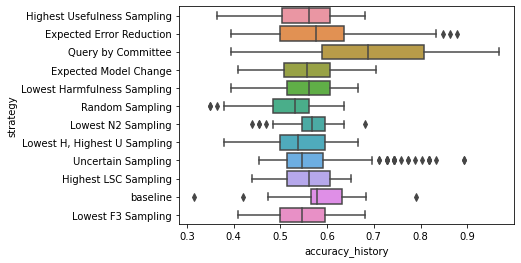

In [17]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

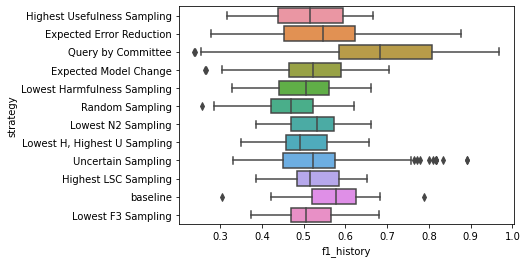

In [18]:
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

NameError: name 'performance_history_total' is not defined

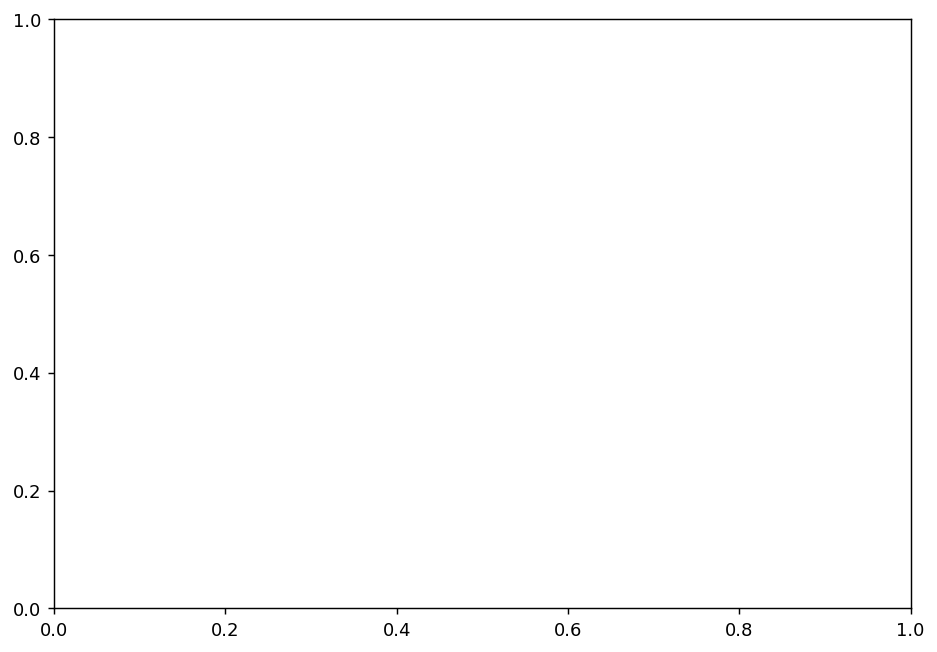

In [19]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

[None]

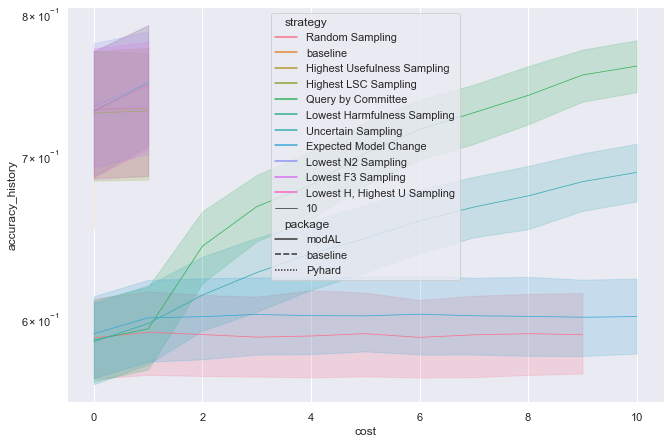

In [63]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

[None]

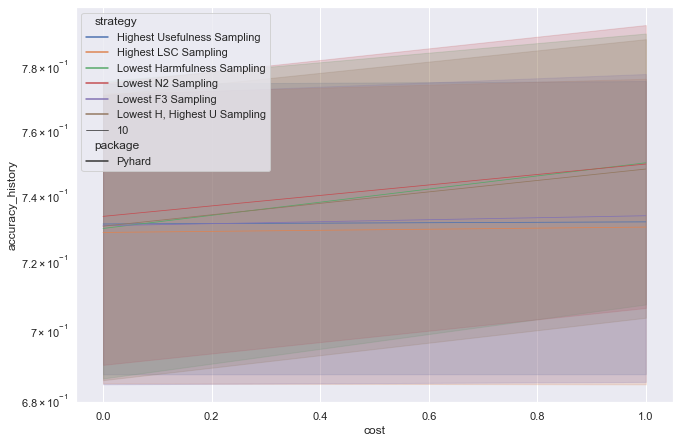

In [64]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [23]:
df_filter = df_all[:]
df_filter = df_filter[(df_filter.package == 'baseline') | (df_filter.package == 'Pyhard') | ((df_filter.package == 'modAL') & (df_filter.cost == 0)) | ((df_filter.package == 'modAL') & (df_filter.cost == 10))]
df_filter[df_filter.cost == 10] = 1

[None]

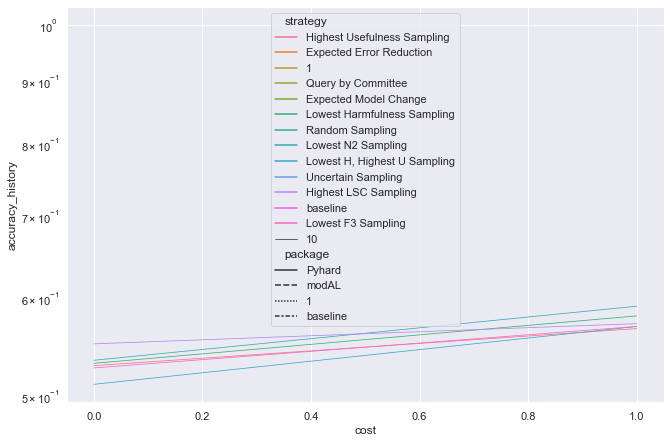

In [24]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package", ci=None,
             data=df_filter[(df_filter.package != "baseline") | (df_filter.classifier == "RF") & (df_filter.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [82]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost
0,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.596154,0.586364,2,0
1,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.567308,0.540771,2,1
2,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.615385,0.600614,2,2
3,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.673077,0.667043,2,3
4,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.673077,0.667043,2,4
...,...,...,...,...,...,...,...,...,...,...
6,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.629637,0,6
7,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.703927,0.604411,0,7
8,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.628297,0,8
9,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.629637,0,9


In [142]:
test['accuracy_history'].head(20)

dataset      package  strategy                  classifier  cost
37_diabetes  modAL    Expected Error Reduction  5NN         0       0.650685
                                                            1       0.621918
                                                            2       0.617808
                                                            3       0.645205
                                                            4       0.654795
                                                            5       0.641096
                                                            6       0.646575
                                                            7       0.635616
                                                            8       0.624658
                                                            9       0.661644
                                                            10      0.652055
                                                C4.5        0       0.646575
           

## Heatmap

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

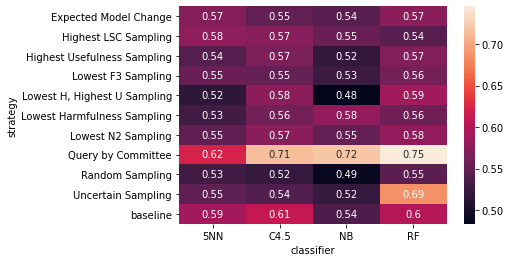

In [20]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

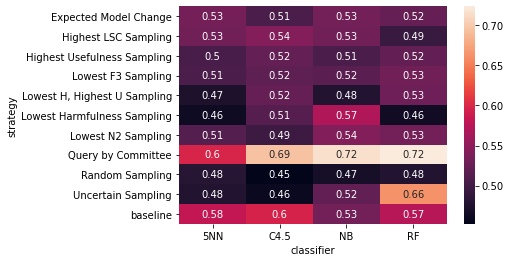

In [21]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

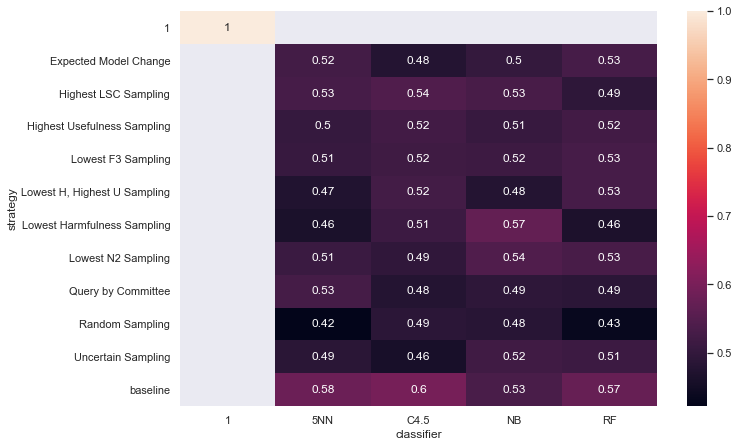

In [25]:
heatmap_data = pd.pivot_table(df_filter[(df_filter.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

In [81]:
df_filter[df_filter.package == '1']

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost
